# Introduction (Importance of Data Augmentation)

<img src="aug_intro.jpg" width="900px" height="900px">

# Import Libraries 

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


original_img = load_img("gaminda.jpg")  
img_array = img_to_array(original_img)
img_array = tf.expand_dims(img_array, 0) 

# Original Image

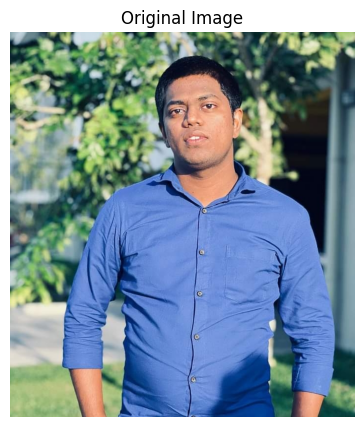

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Psychedelic Twis

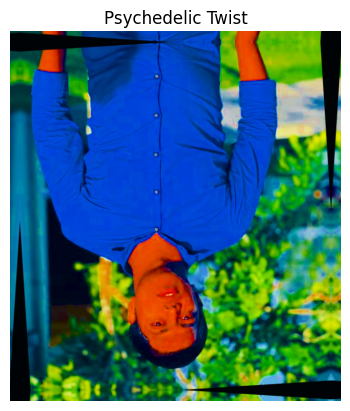

In [6]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.5, fill_mode='constant'),
    tf.keras.layers.RandomContrast(0.5),
    tf.keras.layers.RandomZoom(0.3),
    tf.keras.layers.Lambda(lambda x: tf.image.adjust_saturation(x, 5))
])

psychedelic = augmentation(img_array)
plt.imshow(psychedelic[0].numpy().astype('uint8'))
plt.title("Psychedelic Twist")
plt.axis('off')
plt.show()

# Alien Vision

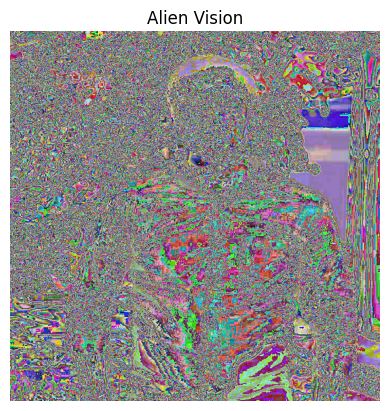

In [7]:
def ensure_rgb(image):
    image = tf.image.grayscale_to_rgb(image) if image.shape[-1] == 1 else image
    return image

def alien_vision(image):
    image = ensure_rgb(image)
    image = tf.image.random_hue(image, 0.1)  
    image = tf.image.adjust_gamma(image, 1.5)  
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)  
    return image

img_path = 'gaminda.jpg'  
img = tf.io.read_file(img_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, [700, 700])

alien = alien_vision(img)

plt.imshow(alien.numpy().astype('uint8'))
plt.title("Alien Vision")
plt.axis('off')
plt.show()

# Glitch Effect

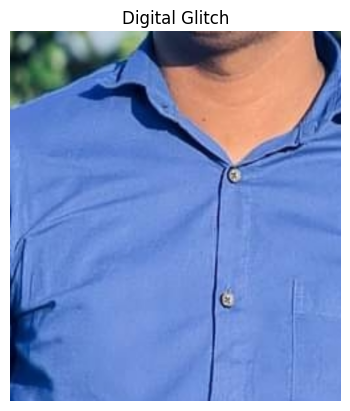

In [8]:
glitch = tf.image.random_flip_left_right(img_array)
glitch = tf.image.random_flip_up_down(glitch)
glitch = tf.image.resize_with_crop_or_pad(glitch, 250, 250)  
glitch = tf.image.resize(glitch, [*original_img.size[::-1]])

plt.imshow(glitch[0].numpy().astype('uint8'))
plt.title("Digital Glitch")
plt.axis('off')
plt.show()

# Dreamy Blur

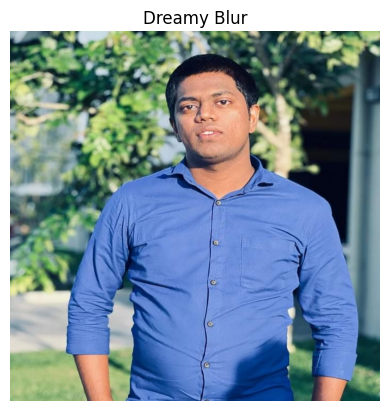

In [9]:
def dreamy_blur(image):
    image = tf.image.resize(image, (700, 700))  
    image = tf.image.adjust_brightness(image, delta=0.1)  
    image = tf.image.random_flip_left_right(image)  
    return image

dreamy = dreamy_blur(img_array)

plt.imshow(dreamy[0].numpy().astype('uint8'))  
plt.title("Dreamy Blur")
plt.axis('off')
plt.show()

# Cyberpunk Filter

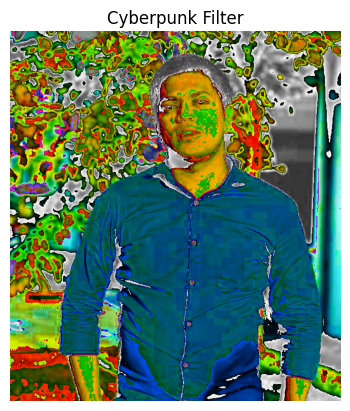

In [10]:
cyberpunk = tf.image.adjust_contrast(img_array, 3.0)
cyberpunk = tf.image.adjust_saturation(cyberpunk, 4.0)
cyberpunk = tf.image.random_brightness(cyberpunk, 0.3)

plt.imshow(cyberpunk[0].numpy().astype('uint8'))
plt.title("Cyberpunk Filter")
plt.axis('off')
plt.show()

# Mystical Mist

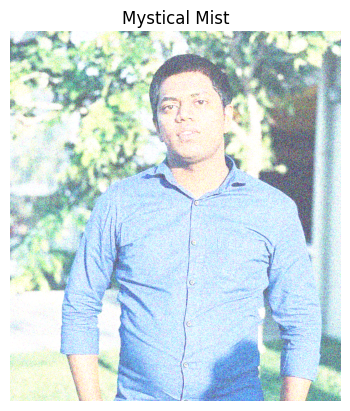

In [11]:
noise = tf.random.normal(shape=tf.shape(img_array), mean=0.8, stddev=0.3)
mist = tf.clip_by_value((img_array/255.0 + noise*0.5), 0.0, 1.0)

plt.imshow(mist[0].numpy())
plt.title("Mystical Mist")
plt.axis('off')
plt.show()

# Time Warp

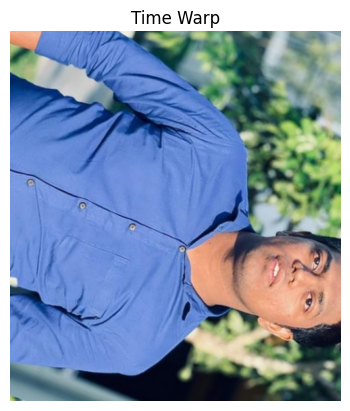

In [12]:
def time_warp(image):
    image = tf.keras.layers.RandomRotation(0.8, fill_mode='wrap')(image)
    image = tf.keras.layers.RandomZoom(0.5, fill_mode='wrap')(image)
    return tf.image.central_crop(image, 0.7)

warped = time_warp(img_array)
plt.imshow(warped[0].numpy().astype('uint8'))
plt.title("Time Warp")
plt.axis('off')
plt.show()

# Neon Noir

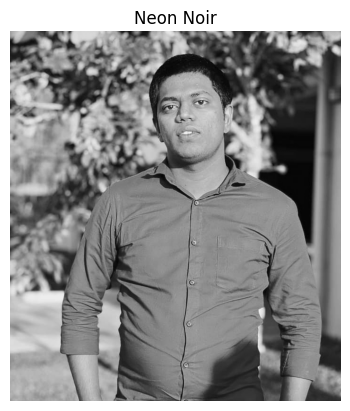

In [13]:
neon = tf.image.rgb_to_grayscale(img_array)
neon = tf.image.grayscale_to_rgb(neon)
neon = tf.image.adjust_hue(neon, 0.7)

plt.imshow(neon[0].numpy().astype('uint8'))
plt.title("Neon Noir")
plt.axis('off')
plt.show()

# Galactic Core

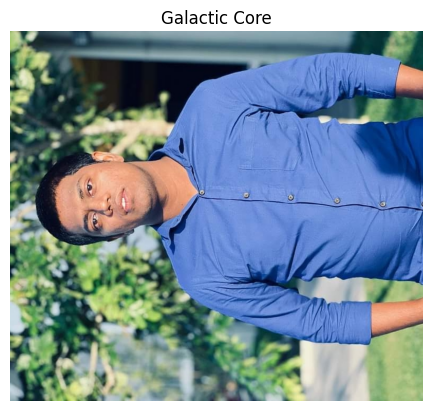

In [14]:
def galactic_core(image):
    image = tf.image.adjust_brightness(image, delta=0.8)  
    image = tf.image.random_brightness(image, max_delta=0.8)  
    return tf.image.rot90(image)

galactic = galactic_core(img_array)
plt.imshow(galactic[0].numpy().astype('uint8'))
plt.title("Galactic Core")
plt.axis('off')
plt.show()